**Single Layer Network**

In [3]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

from sklearn import datasets


import warnings
warnings.filterwarnings('ignore')

In [181]:
# HARD CODED VALUES IN CAPS AND IN 2ND CELL
RANDOM_STATE = 24
np.random.RandomState(seed=RANDOM_STATE)

N_SAMPLE = 1000
NOISE = 0.2
ALPHA = 0.1
TEST_SIZE = 0.3
EPOCHS = 200



In [5]:

# Set the plotting parameters
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15,4),
          'axes.labelsize' : 'medium',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
          #'text.usetex':True,
          #'text.latex.unicode':True
          }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm

plt.style.use('seaborn-v0_8-darkgrid')
#plt.style.use('ggplot')



##LOAD DATA
sklearn make_moons

In [9]:
X, y = datasets.make_moons(n_samples=N_SAMPLE, noise = NOISE , shuffle=True, random_state=RANDOM_STATE)
X.shape , y.shape

((1000, 2), (1000,))

# EDA
1. plot data
2. print min max avg

In [10]:
data_df = pd.DataFrame(X,columns=['A','B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Axes: xlabel='A', ylabel='B'>

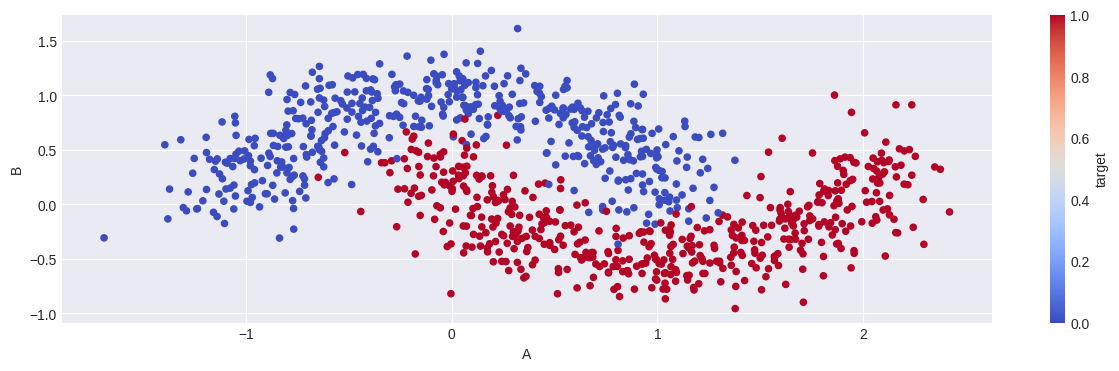

In [43]:
data_df.plot.scatter('A','B',c= 'target' ,cmap=CMAP)

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [12]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [15]:
data_df.isna().sum()

,0
A,0
B,0
target,0


In [123]:
# def predict(row,wgts):
#   z = wgts[0]
#   for i in range(len(row)-1):
#     z += wgts[i+1]*row[i]
#   return 1 if z>=0 else 0

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(row,wgts):
  z = wgts[0]
  for i in range(len(row)-1):
    z += wgts[i+1]*row[i]
  return 1 if sigmoid(z)>=0.5 else 0


In [124]:
weights = np.array([0.1,2.0,1.0])
predict(data_df.loc[0].values,weights)

1

**Split dataset**

In [125]:
features_df = data_df.drop('target',axis=1)
labels = data_df['target']

In [126]:
data_train,data_test = data_df.to_numpy()[:900],data_df.to_numpy()[900:]
display(data_train.shape)
type(data_train)

(900, 3)

numpy.ndarray

In [127]:
# rng  = np.random.default_rng(seed=RANDOM_STATE)
# weights = rng.random(data_train.shape[1])
# weights


In [177]:
rng  = np.random.default_rng(seed=RANDOM_STATE)
def train_weights(train,alpha,n_epoch):
    errors=[]
    weights = rng.random(train.shape[1]) #randomly generated weights
    m = train.shape[0]  #no of samples
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row,weights)
            dz = prediction - row[-1] #a-y
            # sum_error +=  (prediction - row[-1] )**2 #sum of squared error
            sum_error += -row[-1]*np.log(prediction) #for sigmoid

            weights[0] += - alpha*dz/m
            for i in range(len(row)-1):
                  weights[i+1] += - alpha*dz*row[i]/m
        errors.append(sum_error/m)
    return errors,weights


In [178]:
errors,weights = train_weights(data_train,ALPHA,EPOCHS)
print(len(errors))
print(len(weights))
weights

2000
3


array([-6.44966640e-05,  2.84622562e-04, -4.06978625e-04])

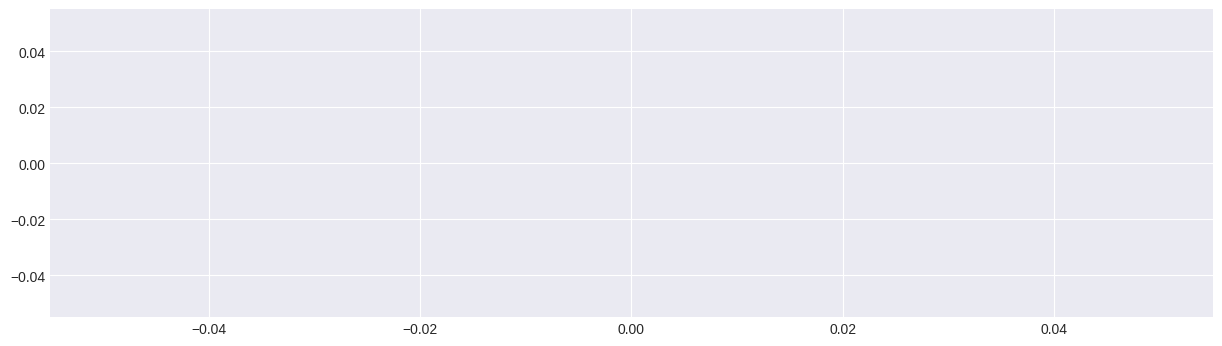

In [179]:
fig, ax= plt.subplots()
ax.plot(errors)
plt.show()

In [164]:
def fn_plot_decision_boundary(wts,X):
  fig,ax = plt.subplots(figsize=(8,5))
  dm=0.01 #increment step
  # min and max along two axis
  x_min,x_max = X[:,0].min(),X[:,0].max()  #MIN MAX
  y_min,y_max = X[:,1].min(),X[:,1].max()

  #generate a mesh grid
  xx,yy = np.meshgrid(np.arange(x_min,x_max,dm),np.arange(y_min,y_max,dm))

  XX =np.c_[xx.ravel(),yy.ravel()]

  XX = np.hstack((XX,np.ones((XX.shape[0],1))))

  y_pred = []

  for row in XX:
    #y_p = predict(row,wts)
    # y_pred.append(y_p)

    a = predict(row,wts)
    y_pred.append(a)

  z = np.array(y_pred).reshape(xx.shape)

  ax.contour(xx,yy,z,alpha=0.8,cmap = plt.cm.Paired)
  ax.scatter(X[:,0],X[:,1],c=X[:,2], edgecolor='k')
  plt.show()


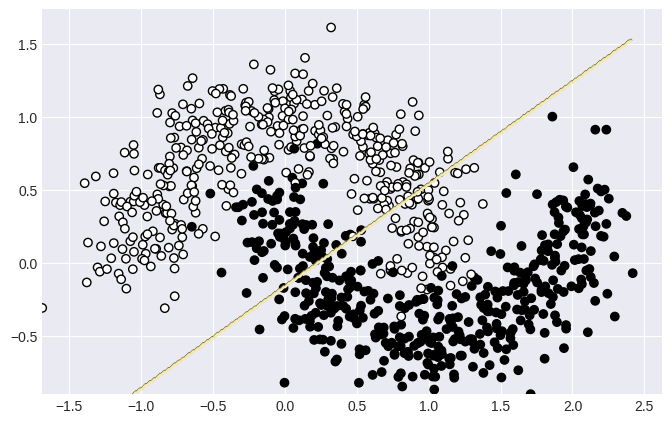

In [165]:
fn_plot_decision_boundary(weights,data_train)

**Accuracies, Confusion Matrix**

In [170]:
preds=[]

for row in data_train:

  a = predict(row, weights)

  y_pred = 0

  if a>=0.5:
    y_pred = 1
  preds.append(y_pred)

accuracy_score(data_train[:,-1], preds)

0.83

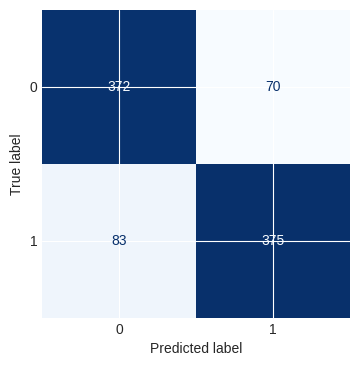

In [173]:
cm= confusion_matrix(data_train[:,-1], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize= (4,4))
disp.plot(ax= ax, cmap= 'Blues', colorbar=False)
plt.show()